<a href="https://colab.research.google.com/github/pascuapablo/CEIA/blob/master/scripts/computer_visio/Clase_3_VGG16_con_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O cats_and_dogs_filtered.zip

--2020-11-21 13:44:26--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  37.1MB/s    in 1.8s    

2020-11-21 13:44:28 (37.1 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [8]:
! unzip -q cats_and_dogs_filtered.zip

In [9]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, Model
import numpy as np

In [10]:
train_dir = "cats_and_dogs_filtered/train"
validation_dir = "cats_and_dogs_filtered/validation"
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=train_dir,target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=validation_dir, target_size=(224,224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Reescribir la red utilizando el método funcional y definiendo una función de ayuda.

In [11]:
## inputs = Input(shape=(224,224,3)), etc.
def create_block(n_filters, n_layers, inputs):
    '''
    Entradas:
     n_filters: numero de filtros del bloque
     n_layers: número de capas del bloque
     inputs: tensor de entrada
    Retorna:
     tensor de salida con las capas aplicadas
    '''
    # usar un bucle for para agregar n_layers capas convolucionales
    # luego, agregar la capa MaxPool2D y retornarla
    for i in range(n_layers):
      inputs = Conv2D(filters=n_filters,kernel_size=(3,3),padding="same", activation="relu")(inputs)
     
    # agregar capa max pool
    inputs = MaxPooling2D(pool_size=(2, 2), strides=2, padding='same')(inputs)
    return inputs # retornar el tensor
    
# reemplazar los bloques usando la función create_block
inputs = Input(shape=(224,224,3))
x = create_block(64,2,inputs)
x = create_block(128,2,x)
x = create_block(256,3,x)
x = create_block(512,3,x)
x = create_block(512,3,x)
x = Flatten()(x)
x = Dense(4096)(x)
x = Dense(4096)(x)
x = Dense(2, activation='softmax')(x)


#...
#...
model = Model(inputs, x)
# etc.

# model = Sequential()
# model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Flatten())
# model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=2, activation="softmax"))
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)      

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='auto', save_freq=1000)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')


In [17]:
hist = model.fit_generator(generator=traindata, validation_data= testdata, validation_steps=10,epochs=10,callbacks=[checkpoint,early])

Epoch 1/10
63/63 [==============================] - 15s 233ms/step - loss: 0.7142 - accuracy: 0.5090 - val_loss: 0.7024 - val_accuracy: 0.4844
Epoch 2/10
63/63 [==============================] - 15s 232ms/step - loss: 0.7164 - accuracy: 0.5000 - val_loss: 0.7051 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 15s 233ms/step - loss: 0.7135 - accuracy: 0.5030 - val_loss: 0.6919 - val_accuracy: 0.5281
Epoch 4/10
63/63 [==============================] - 15s 231ms/step - loss: 0.7410 - accuracy: 0.5000 - val_loss: 0.7368 - val_accuracy: 0.5031
Epoch 5/10
63/63 [==============================] - 15s 232ms/step - loss: 0.7177 - accuracy: 0.5080 - val_loss: 0.6976 - val_accuracy: 0.4844
Epoch 6/10
63/63 [==============================] - 15s 233ms/step - loss: 0.7044 - accuracy: 0.4790 - val_loss: 0.7020 - val_accuracy: 0.5281
Epoch 7/10
63/63 [==============================] - 15s 232ms/step - loss: 0.7092 - accuracy: 0.4830 - val_loss: 0.6925 - val_accuracy: 0.5188

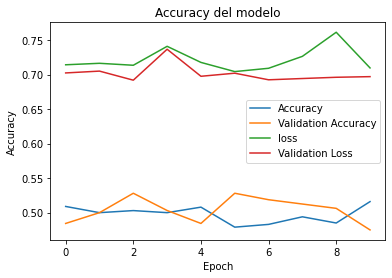

In [20]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Accuracy del modelo")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [21]:
from tensorflow.keras.preprocessing import image
# bajar una imagen de ejemplo de internet
img = image.load_img("ejemplo.jpeg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

FileNotFoundError: ignored